# **Desafio Elixir**

#Aquisição dos dados

##Imports

In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


##Request dos Banco de dados

In [2]:

host = 'db-stone.cjepwwjnksng.us-east-1.rds.amazonaws.com'
port = '5432'
dbname = 'postgres'
username = 'read_only_user'
pwd = 'banking123'

conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(host, port, dbname, username, pwd))
customers = sqlio.read_sql_query("select * from customers;", conn)
cards = sqlio.read_sql_query("select * from cards;", conn)
transactions = sqlio.read_sql_query("select * from transactions;", conn)
frauds = sqlio.read_sql_query("select * from frauds;", conn)

conn = None

##Descrição rápida dos Dados

In [3]:

print('Descricao:\n',customers.describe())
print('Tamanho:\n',customers.size)
print('Customers:\n',)
customers

Descricao:
                age
count  5674.000000
mean     35.059922
std       8.962637
min      20.000000
25%      27.000000
50%      35.000000
75%      43.000000
max      50.000000
Tamanho:
 22696
Customers:



,id,age,segment,vintage_group
0,CC25034,35,Diamond,VG1
1,CC59625,22,Diamond,VG1
2,CC69314,33,Diamond,VG1
3,CC67036,46,Diamond,VG1
4,CC25597,44,Diamond,VG1
...,...,...,...,...
5669,CC53430,27,Platinum,VG2
5670,CC31823,33,Platinum,VG2
5671,CC15335,28,Platinum,VG2
5672,CC81556,26,Platinum,VG2


In [4]:

print('Descricao:\n',cards.describe())
print('Tamanho:\n',cards.size)
print('Cards:\n')
cards

Descricao:
         credit_limit
count     500.000000
mean   252614.000000
std    269881.769193
min      2000.000000
25%     35000.000000
50%    139000.000000
75%    412500.000000
max    899000.000000
Tamanho:
 2000
Cards:



,card_number,card_family,credit_limit,customer_id
0,8638-5407-3631-8196,Premium,530000,CC67088
1,7106-4239-7093-1515,Gold,18000,CC12076
2,6492-5655-8241-3530,Premium,596000,CC97173
3,2868-5606-5152-5706,Gold,27000,CC55858
4,1438-6906-2509-8219,Platinum,142000,CC90518
...,...,...,...,...
495,4708-4407-9601-6022,Premium,691000,CC64993
496,6042-2856-7280-2925,Gold,33000,CC26787
497,8706-3809-5167-3899,Premium,144000,CC32532
498,9540-8558-5897-5046,Premium,830000,CC90246


In [5]:

print('Descricao:\n',transactions.describe())
print('Tamanho:\n',transactions.size)
print('Transactions:\n')
transactions

Descricao:
               value
count  10000.000000
mean   24758.741300
std    14371.088758
min      103.000000
25%    12317.500000
50%    24720.500000
75%    37036.250000
max    49995.000000
Tamanho:
 50000
Transactions:



,id,card_number,transaction_date,value,segment
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,SEG16
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,SEG14
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,SEG17
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,SEG14
...,...,...,...,...,...
9995,CTID25037573,9157-2802-8374-1145,2016-06-10,44280,SEG18
9996,CTID43832298,7416-4529-6690-5703,2016-05-23,27163,SEG12
9997,CTID56532072,6699-2639-4522-6219,2016-08-06,36424,SEG13
9998,CTID88101446,8341-5263-4582-7396,2016-10-10,8464,SEG14


In [6]:
print('Descricao:\n',frauds.describe())
print('Tamanho:\n',frauds.size)
print('Frauds:\n')
frauds

Descricao:
        transaction_id fraud_flag
count             109        109
unique            109          1
top      CTID66191168       True
freq                1        109
Tamanho:
 218
Frauds:



,transaction_id,fraud_flag
0,CTID50558449,True
1,CTID55936882,True
2,CTID63762180,True
3,CTID76723439,True
4,CTID21246201,True
...,...,...
104,CTID57993591,True
105,CTID91108283,True
106,CTID30494187,True
107,CTID51301522,True


#1. Extract and analyze the data in the database in order to answer the following questions. Provide a description and/or comments for each solution.

##What is the average ```age``` of the customers in the database?

Podemos pegar a média da idade dos consumidores direto da descrição do DataFrame ```customers```




In [7]:
# Descricao dos DataFrame dos consumidores
customers.describe()

,age
count,5674.000000
mean,35.059922
std,8.962637
min,20.000000
25%,27.000000
50%,35.000000
75%,43.000000
max,50.000000


Então a idade média dos consumidores é **35.05992**

##How is the ```card_family``` ranked based on the ```credit_limit``` given to each card?

As duas informações estão no DataFrame ```cards```, dela podemos fazer uma ordenação do maior para o menor

In [8]:
# sorted dos limites de creditos
cards_sorted = cards.sort_values(by='credit_limit', ascending=False)
cards_sorted

,card_number,card_family,credit_limit,customer_id
30,7179-9253-8424-9313,Premium,899000,CC32209
411,2264-2870-6785-2725,Premium,899000,CC34812
429,5674-3252-5805-3288,Premium,898000,CC78942
146,2944-6929-3608-9991,Premium,892000,CC37044
452,7966-2894-6066-2530,Premium,889000,CC51058
...,...,...,...,...
304,4971-8219-1133-6753,Gold,4000,CC23687
337,6271-9924-3653-8913,Gold,3000,CC62567
401,3969-9181-6385-4422,Gold,2000,CC71597
274,9207-1270-6690-4905,Gold,2000,CC65624


In [9]:
# Pegar o intervalo de creditos para cada tipo de card_family
for card_type in cards_sorted['card_family'].unique():
  print('Intervalo para {} eh de {} ate {}'.format(card_type, cards_sorted[cards_sorted['card_family'] == card_type].min()['credit_limit'], cards_sorted[cards_sorted['card_family'] == card_type].max()['credit_limit']))

Intervalo para Premium eh de 108000 ate 899000
Intervalo para Platinum eh de 51000 ate 200000
Intervalo para Gold eh de 2000 ate 50000


**Com isso percebemos que o ```card_family``` com maior limite de crédito é o Premium seguido do Platinum e do Gold. É importante perceber que o Premium e o Platinum possuem uma intersecção do limite de créditos, isso pode ser conferido nas seguinte células**

---



In [10]:
# Menores valores de credito do Premium
cards_sorted[cards_sorted['card_family'] == 'Premium'].tail()

,card_number,card_family,credit_limit,customer_id
400,1825-7669-6621-9045,Premium,126000,CC26307
45,8725-3610-8060-2617,Premium,123000,CC34943
315,4703-4800-3443-6825,Premium,121000,CC11486
432,8836-7078-5752-6312,Premium,118000,CC40274
264,4818-7275-3513-3939,Premium,108000,CC11231


In [11]:
# Maiores valores de credito do Platinum
cards_sorted[cards_sorted['card_family'] == 'Platinum'].head()

,card_number,card_family,credit_limit,customer_id
142,8408-7680-2338-9105,Platinum,200000,CC63145
260,7708-8807-7837-8812,Platinum,197000,CC56647
35,2640-5294-8252-8817,Platinum,197000,CC70762
225,8711-5325-4752-4743,Platinum,196000,CC78221
330,7633-7985-2079-2990,Platinum,196000,CC42937


Isso pode ser explicado pelo fato de que o limite de créditos não é a única condição para determinar o ```card_family```, podendo haver outros fatores importantes para determinar esse fator 

##For the transactions flagged as fraud, what are the ids of the transactions with the highest value?

As informações necessárias para essa questão estão nos DataFrames ```frauds``` e ```transactions```, basta então fazer um merge dos DataFrames em relação aos ids

In [12]:
# Renomeio a coluna id das transacoes para transaction_id, isso éé necessáário para fazer o merge entre os dois DataFrames
# usando o id das transacoes para colocar de forma certa as linhas
transactions.rename(columns = {'id':'transaction_id'}, inplace = True)
transacoes_fraude = pd.merge(transactions, frauds, on='transaction_id')

In [13]:
# Ordeno do maior para o menor valor e assim conseguir o id de transacoes fraudulentas
transacoes_fraude[transacoes_fraude['fraud_flag']].sort_values(by='value', ascending=False)

,transaction_id,card_number,transaction_date,value,segment,fraud_flag
6,CTID20567160,3295-6390-4452-7199,2016-10-08,49155,SEG16,True
100,CTID15034243,4562-2665-7578-1931,2016-02-14,48845,SEG19,True
48,CTID95884307,2017-7197-7814-9950,2016-11-07,48588,SEG16,True
7,CTID54759604,8262-8743-6406-7105,2016-09-07,48567,SEG20,True
41,CTID55429304,9030-1667-6058-6173,2016-03-03,48514,SEG15,True
...,...,...,...,...,...,...
32,CTID92439353,8159-1257-4706-7544,2016-01-17,5079,SEG11,True
87,CTID43014391,8106-9789-1679-2552,2016-01-19,4195,SEG25,True
31,CTID56692687,3620-5235-2101-3391,2016-12-15,2211,SEG22,True
52,CTID52594996,8228-6661-8736-2838,2016-08-14,1570,SEG17,True


Os ids das transações fraudulentas de maiores valores são: **CTID20567160, CTID15034243, CTID95884307, CTID54759604, CTID55429304**.

#2.Analysis:

##Analyze whether or not the fraudulent transactions are somehow associated to the other features of the dataset. Explain your results.

###Juntando todos os dados

Para facilitar essa análise é necessário juntar todos os Datasets, para isso basta fazer o merge da mesma forma que fizemos no item anterior.

Para juntar todos os Datasets pegamos o ```id``` dos consumidores e usar como chave com ```o customer_id```, com isso juntos o DataFrame dos consumidores com o dos cartões, o das fraudes e das transações já juntamos no item anterior, para juntar os dois podemos usar o número do cartão, e assim temos todas as tabeas em um único DataFrame

In [14]:
# Renomeio a coluna id das transacoes para customer_id, isso eh necessario para fazer o merge entre os dois DataFrames
# usando o id dos consumidores para colocar de forma certa as linhas
customers.rename(columns={'id': 'customer_id'}, inplace=True)
customers_cards = pd.merge(customers, cards, on='customer_id')
customers_cards

,customer_id,age,segment,vintage_group,card_number,card_family,credit_limit
0,CC55858,30,Diamond,VG1,2868-5606-5152-5706,Gold,27000
1,CC46077,49,Diamond,VG1,6876-7378-4945-3251,Gold,44000
2,CC46484,49,Diamond,VG1,5556-4557-4566-1540,Gold,45000
3,CC59340,25,Diamond,VG1,5618-9718-9367-2102,Gold,14000
4,CC62994,48,Diamond,VG1,1652-7516-1273-1992,Platinum,180000
...,...,...,...,...,...,...,...
495,CC59562,39,Platinum,VG2,9157-2802-8374-1145,Premium,656000
496,CC15336,25,Platinum,VG2,2046-1892-2379-9050,Premium,313000
497,CC30954,49,Platinum,VG2,9558-5469-2562-5608,Premium,596000
498,CC13567,44,Platinum,VG2,1159-7886-1385-5540,Platinum,163000


In [15]:
# Renomeio a coluna id das transacoes para transaction_id, isso eh necessario para fazer o merge entre os dois DataFrames
# usando o id das transacoes para colocar de forma certa as linhas
transactions.rename(columns = {'id':'transaction_id'}, inplace = True)
transacoes_fraude = pd.merge(transactions, frauds, on='transaction_id', how='left').fillna(False)
transacoes_fraude

,transaction_id,card_number,transaction_date,value,segment,fraud_flag
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25,False
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,SEG16,False
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,SEG14,False
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,SEG17,False
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,SEG14,False
...,...,...,...,...,...,...
9995,CTID25037573,9157-2802-8374-1145,2016-06-10,44280,SEG18,False
9996,CTID43832298,7416-4529-6690-5703,2016-05-23,27163,SEG12,False
9997,CTID56532072,6699-2639-4522-6219,2016-08-06,36424,SEG13,False
9998,CTID88101446,8341-5263-4582-7396,2016-10-10,8464,SEG14,False


In [16]:
# Merge de todos as tabelas, e assim colocar todas as informacoes em um unico DataFrame
df = pd.merge(customers_cards, transacoes_fraude, on='card_number')
df

,customer_id,age,segment_x,vintage_group,card_number,card_family,credit_limit,transaction_id,transaction_date,value,segment_y,fraud_flag
0,CC55858,30,Diamond,VG1,2868-5606-5152-5706,Gold,27000,CTID98358171,2016-05-12,19701,SEG19,False
1,CC55858,30,Diamond,VG1,2868-5606-5152-5706,Gold,27000,CTID13079106,2016-06-17,22753,SEG16,False
2,CC55858,30,Diamond,VG1,2868-5606-5152-5706,Gold,27000,CTID60181351,2016-05-30,23901,SEG19,False
3,CC55858,30,Diamond,VG1,2868-5606-5152-5706,Gold,27000,CTID14362048,2016-01-10,46693,SEG17,False
4,CC55858,30,Diamond,VG1,2868-5606-5152-5706,Gold,27000,CTID52464565,2016-01-19,46666,SEG16,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CC42937,30,Platinum,VG2,7633-7985-2079-2990,Platinum,196000,CTID40011919,2016-08-29,23182,SEG22,False
9996,CC42937,30,Platinum,VG2,7633-7985-2079-2990,Platinum,196000,CTID44136345,2016-06-30,196,SEG24,False
9997,CC42937,30,Platinum,VG2,7633-7985-2079-2990,Platinum,196000,CTID31470785,2016-07-14,9858,SEG18,False
9998,CC42937,30,Platinum,VG2,7633-7985-2079-2990,Platinum,196000,CTID53959403,2016-09-04,24145,SEG13,False


###Limpeza dos Dados

Para fazer boa parte das análises é necessário fazer algumas limpezas nos DataSets, de forma geral, informações únicas são as que queremos descartar, no nosso caso, os ids e os números dos cartões 

In [17]:
df = df.drop(columns=['customer_id', 'card_number', 'transaction_id'])
df

,age,segment_x,vintage_group,card_family,credit_limit,transaction_date,value,segment_y,fraud_flag
0,30,Diamond,VG1,Gold,27000,2016-05-12,19701,SEG19,False
1,30,Diamond,VG1,Gold,27000,2016-06-17,22753,SEG16,False
2,30,Diamond,VG1,Gold,27000,2016-05-30,23901,SEG19,False
3,30,Diamond,VG1,Gold,27000,2016-01-10,46693,SEG17,False
4,30,Diamond,VG1,Gold,27000,2016-01-19,46666,SEG16,False
...,...,...,...,...,...,...,...,...,...
9995,30,Platinum,VG2,Platinum,196000,2016-08-29,23182,SEG22,False
9996,30,Platinum,VG2,Platinum,196000,2016-06-30,196,SEG24,False
9997,30,Platinum,VG2,Platinum,196000,2016-07-14,9858,SEG18,False
9998,30,Platinum,VG2,Platinum,196000,2016-09-04,24145,SEG13,False


In [18]:
df['transaction_date'] = df['transaction_date'].astype('str')
df['transaction_date'] = df['transaction_date'].str.replace('-', '', regex=False)
df['transaction_date'] = df['transaction_date'].astype('int')
df

,age,segment_x,vintage_group,card_family,credit_limit,transaction_date,value,segment_y,fraud_flag
0,30,Diamond,VG1,Gold,27000,20160512,19701,SEG19,False
1,30,Diamond,VG1,Gold,27000,20160617,22753,SEG16,False
2,30,Diamond,VG1,Gold,27000,20160530,23901,SEG19,False
3,30,Diamond,VG1,Gold,27000,20160110,46693,SEG17,False
4,30,Diamond,VG1,Gold,27000,20160119,46666,SEG16,False
...,...,...,...,...,...,...,...,...,...
9995,30,Platinum,VG2,Platinum,196000,20160829,23182,SEG22,False
9996,30,Platinum,VG2,Platinum,196000,20160630,196,SEG24,False
9997,30,Platinum,VG2,Platinum,196000,20160714,9858,SEG18,False
9998,30,Platinum,VG2,Platinum,196000,20160904,24145,SEG13,False


###Análise dos dados(plots)

####Imports e configurações

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn module 

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[6,3]
plt.rcParams['figure.dpi']=80

####Distribuição dos valores da transação

**Gráfico 1**

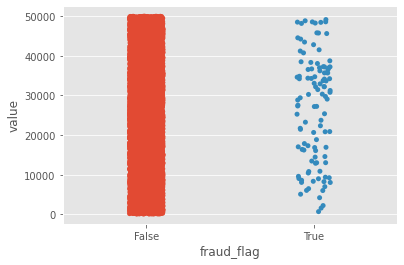

In [49]:

g = sns.stripplot(x="fraud_flag", y="value", data=df,jitter=True)

####Quantidade de cada seguimento nas fraudes

**Gráfico 2**

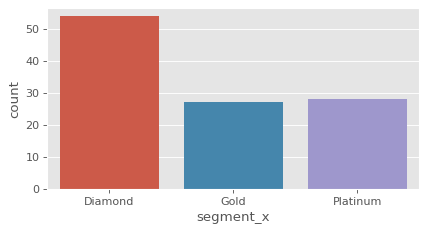

In [21]:
df.groupby(['segment_x','fraud_flag'])['fraud_flag'].count()
fraudes = df[df['fraud_flag']]
sns.countplot(x='segment_x',data=fraudes)

**Gráfico 3**

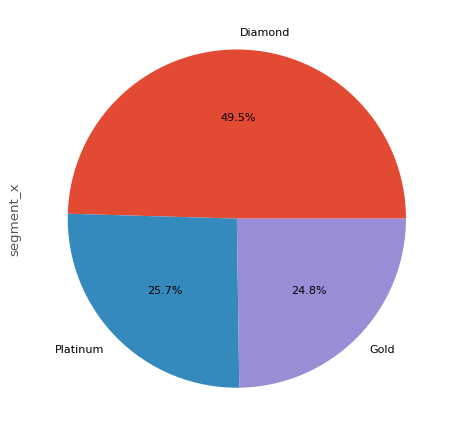

In [22]:
df['segment_x'][df['fraud_flag']].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7))

####Quantidade de ```card_family``` nas fraudes

**Gráfico 4**

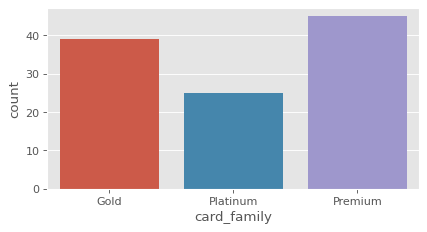

In [23]:
fraudes.groupby(['card_family','fraud_flag'])['fraud_flag'].count()
sns.countplot(x='card_family',data=fraudes)

**Gráfico 5**

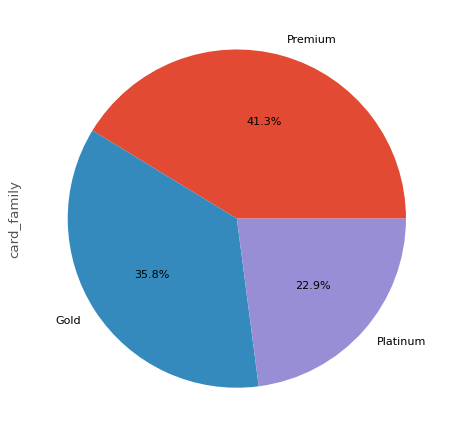

In [24]:
fraudes['card_family'].value_counts().plot.pie(autopct="%1.1f%%",figsize=(10,7))

####Distribuição das idades

In [25]:
print('Idade do consumidor mais velho:',df['age'].max(),'anos')
print('Idade do consumidor mais novo:',df['age'].min(),'anos')
print('Idade média',df['age'].mean(),'anos')

Idade do consumidor mais velho: 50 anos
Idade do consumidor mais novo: 20 anos
Idade média 35.5712 anos


**Gráfico 6**

Text(0.5, 1.0, 'Distribuição das idades dos consumidores')

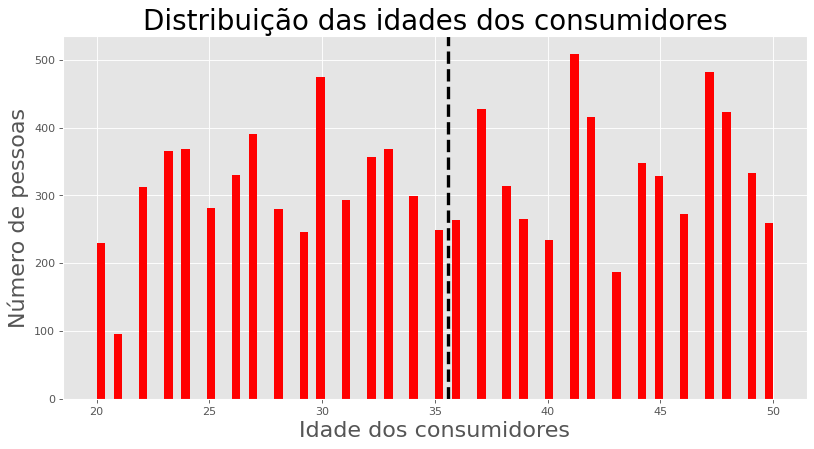

In [26]:
plt.figure(figsize=(12,6))
df[df['age']<200000].age.hist(bins=80,color='red')
plt.axvline(df[df['age']<=100].age.mean(),color='black',linestyle='dashed',linewidth=3)
plt.xlabel('Idade dos consumidores',fontsize=20)
plt.ylabel('Número de pessoas',fontsize=20)
plt.title('Distribuição das idades dos consumidores',fontsize=25)

**Distribuição da idade para cada situação**

**Gráfico 7**

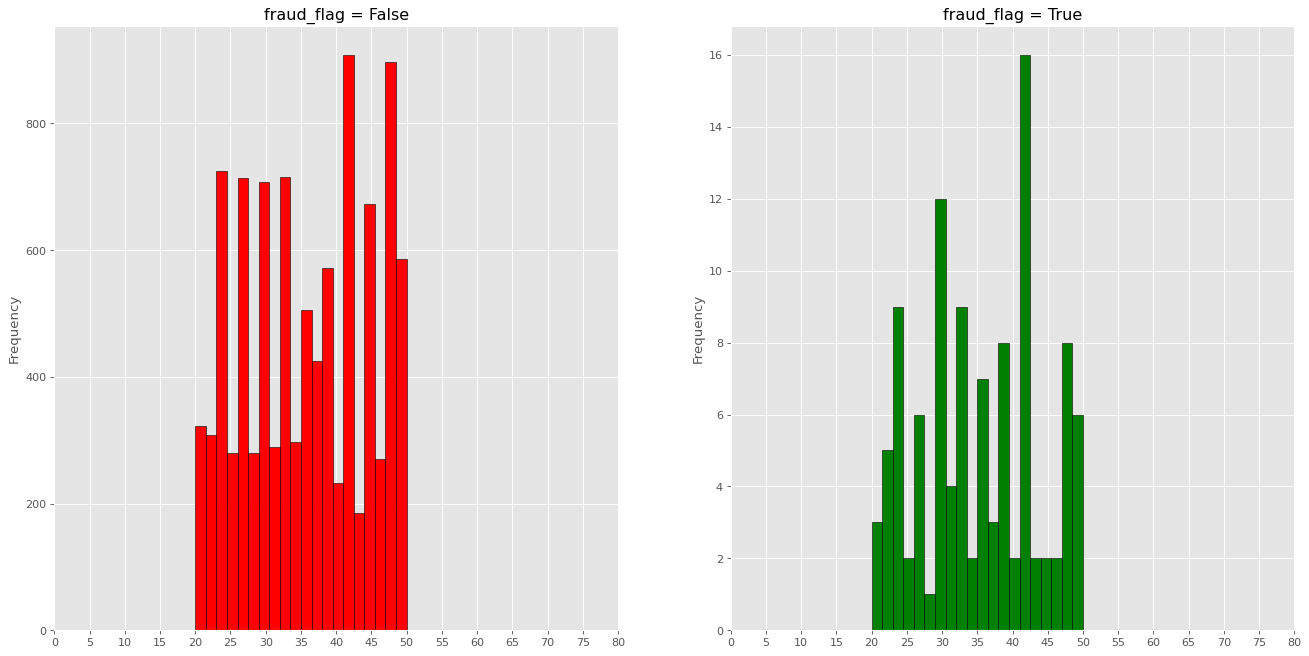

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['fraud_flag']==False].age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('fraud_flag = False')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['fraud_flag']].age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('fraud_flag = True')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

####Distribuição das fraudes em relação à data

**Gráfico 8**

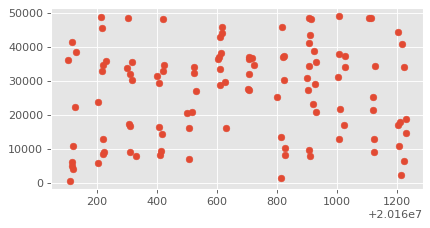

In [28]:
plt.scatter(x=df['transaction_date'][df['fraud_flag']], y=df['value'][df['fraud_flag']])

####Distribuição Pelo Limite de Créditos

**Gráfico 9**

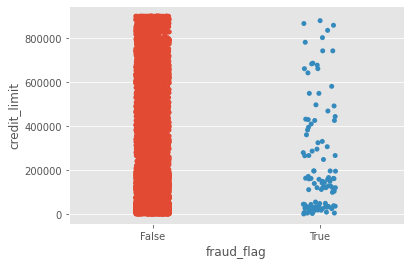

In [50]:
g = sns.stripplot(x="fraud_flag", y="credit_limit", data=df,jitter=True)

###A partir dos gráficos 7 e 8 podemos perceber que não há uma relação muito clara entre a ocorrência das fraudes com a idade e a data. Podemos concluir que pelos gráficos 2, 3, 4 e 5 a maioria das fraudes ocorrem no seguimento Diamente e na ```card_family``` Premium, além de que pelo gráfico 9 a maioria das fraudes ocorrem nos menores valores de limite de créditos, mas pelo valor da transferência temos uma distribuição bem homonegênea, com maior concentração em valores maiores.

###Disso tudo podemos tirar que o valor das transferências tem uma relação pela ocorrência das fraudes, além de que pode haver uma relação entre a ```card_family``` e a ```segment_x```, já que há uma maioria de ocorrências em determinados setores.

###Modelos

Nessas seguintes células tento aplicar modelos simples de machine learning para ver se consigo obter alguma relação não perceptível entre a fraude e as demais labels. Contudo é importante notar que temos muitos poucos dados sobre a ocorrência da fraude, e caso usássemos todos os dados provavelmente os modelos ficarão com overfiting, dando um viés muito maior para não ser fraude

####Imports

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


####Funções para visualização

In [30]:
import matplotlib.pyplot as matplotlib
import seaborn
import pandas
import numpy
%matplotlib inline


# Faz um plot da árvore de decisões
def plot_tree(model,x_train):
    matplotlib.figure(figsize=(15,15), facecolor='k')
    tree.plot_tree(model, feature_names=x_train.columns, class_names=['True','False'], fontsize=14, filled=True)
    matplotlib.show()

# Faz um plot das importâncias para um Random Forest
def plot_importances(model,df):
    importances = model.feature_importances_
    indices = numpy.argsort(importances)
    matplotlib.figure(figsize=(12,8))
    matplotlib.barh(range(len(indices)), importances[indices], color='b', align='center')
    matplotlib.yticks(range(len(indices)), df.columns[indices])
    matplotlib.suptitle('Importância das características')
    matplotlib.show()
    

####One Hot Encoder

#####Tratamento do DataFrame para One Hot Encoder

In [43]:
df_model = pd.get_dummies(df, columns=['vintage_group', 'card_family', 'segment_y', 'segment_x'])
df_model

,age,credit_limit,transaction_date,value,fraud_flag,vintage_group_0,vintage_group_1,vintage_group_2,card_family_0,card_family_1,card_family_2,segment_y_0,segment_y_1,segment_y_2,segment_y_3,segment_y_4,segment_y_5,segment_y_6,segment_y_7,segment_y_8,segment_y_9,segment_y_10,segment_y_11,segment_y_12,segment_y_13,segment_y_14,segment_x_0,segment_x_1,segment_x_2
0,30,27000,20160512,19701,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,30,27000,20160617,22753,False,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,30,27000,20160530,23901,False,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,30,27000,20160110,46693,False,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,30,27000,20160119,46666,False,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,196000,20160829,23182,False,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
9996,30,196000,20160630,196,False,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9997,30,196000,20160714,9858,False,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9998,30,196000,20160904,24145,False,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
data = df_model[df_model['fraud_flag'] == False].sample(frac = 0.02)
data = pd.concat([df_model[df_model['fraud_flag'] == True], data])
y = data['fraud_flag']
X = data.drop(columns=['fraud_flag'])
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [45]:
data

,age,credit_limit,transaction_date,value,fraud_flag,vintage_group_0,vintage_group_1,vintage_group_2,card_family_0,card_family_1,card_family_2,segment_y_0,segment_y_1,segment_y_2,segment_y_3,segment_y_4,segment_y_5,segment_y_6,segment_y_7,segment_y_8,segment_y_9,segment_y_10,segment_y_11,segment_y_12,segment_y_13,segment_y_14,segment_x_0,segment_x_1,segment_x_2
269,26,20000,20160618,45760,True,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
330,23,167000,20161121,21462,True,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
403,35,492000,20161115,48453,True,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
425,32,50000,20160824,30339,True,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
445,41,112000,20160606,37002,True,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,33,104000,20160308,4322,False,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1774,33,45000,20160110,34178,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
9463,40,650000,20161211,15951,False,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
171,45,22000,20161015,6860,False,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


#####Regressão Logística

In [46]:

model = LogisticRegression()
model.fit(x_train,y_train)

result = model.predict(x_test)
print(accuracy_score(result, y_test))
print(confusion_matrix(result, y_test))

0.5980392156862745
[[61 41]
 [ 0  0]]


#####Árvore de Decisão

0.5980392156862745
[[53 33]
 [ 8  8]]


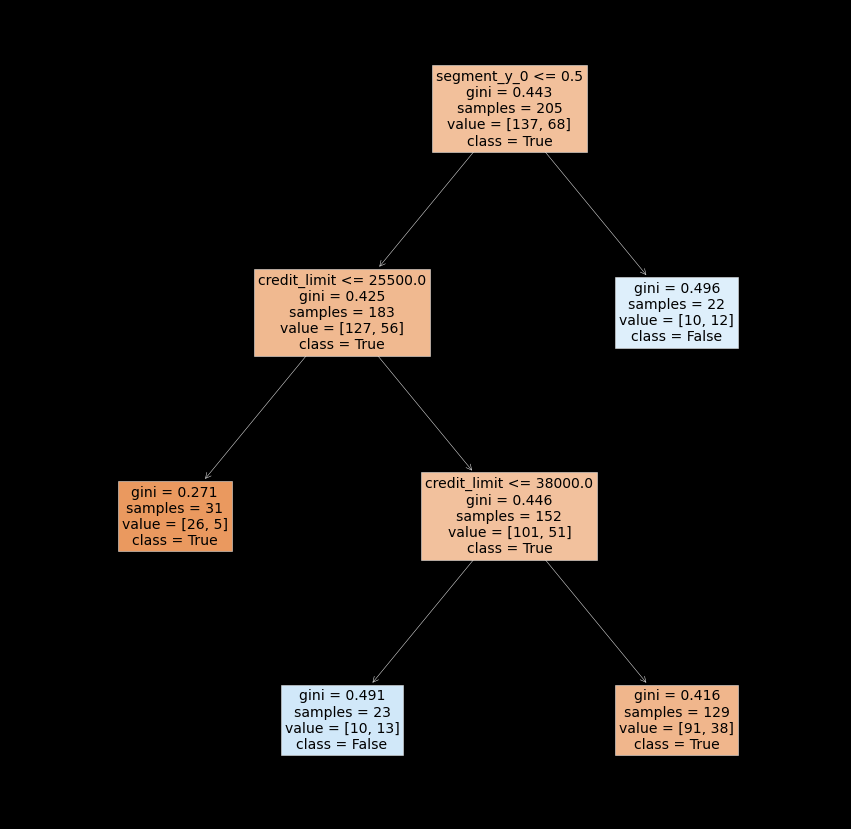

In [47]:


model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 20)
model.fit(x_train,y_train)

result = model.predict(x_test)
print(accuracy_score(result, y_test))
print(confusion_matrix(result, y_test))
plot_tree(model,x_train)

#####Random Forest

0.6372549019607843
[[56 32]
 [ 5  9]]


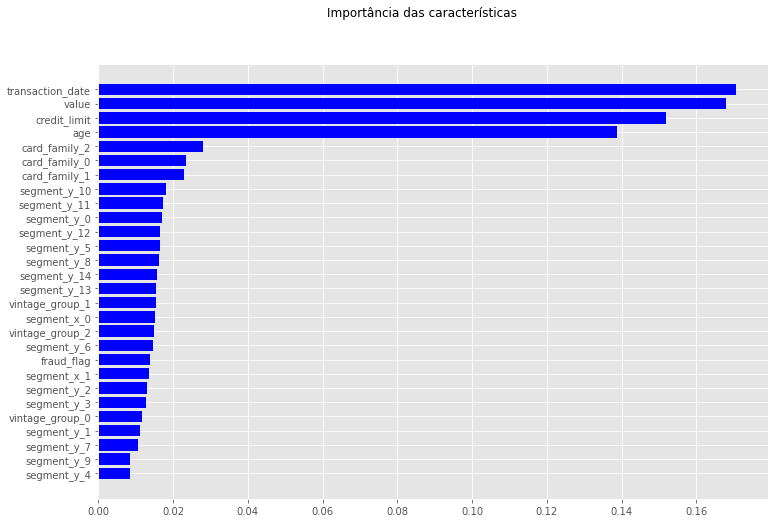

In [48]:


model = RandomForestClassifier()
model.fit(x_train,y_train)

result = model.predict(x_test)
print(accuracy_score(result, y_test))
print(confusion_matrix(result, y_test))
#plot_importances(model,data)

importances = model.feature_importances_
indices = numpy.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), data.columns[indices])
plt.suptitle('Importância das características')
plt.show()

####Encoder numérico

#####Tratamento do DataFrame para One Hot Encoder

In [37]:
lb_make = LabelEncoder()
df_model = df
df_model["vintage_group"] = lb_make.fit_transform(df["vintage_group"])
df_model["card_family"] = lb_make.fit_transform(df["card_family"])
df_model["segment_y"] = lb_make.fit_transform(df["segment_y"])
df_model["segment_x"] = lb_make.fit_transform(df["segment_x"])
df_model

,age,segment_x,vintage_group,card_family,credit_limit,transaction_date,value,segment_y,fraud_flag
0,30,0,0,0,27000,20160512,19701,8,False
1,30,0,0,0,27000,20160617,22753,5,False
2,30,0,0,0,27000,20160530,23901,8,False
3,30,0,0,0,27000,20160110,46693,6,False
4,30,0,0,0,27000,20160119,46666,5,False
...,...,...,...,...,...,...,...,...,...
9995,30,2,1,1,196000,20160829,23182,11,False
9996,30,2,1,1,196000,20160630,196,13,False
9997,30,2,1,1,196000,20160714,9858,7,False
9998,30,2,1,1,196000,20160904,24145,2,False


In [38]:
data = df_model[df_model['fraud_flag'] == False].sample(frac = 0.02)
data = pd.concat([df_model[df_model['fraud_flag'] == True], data])
y = data['fraud_flag']
X = data.drop(columns=['fraud_flag'])
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [39]:
data

,age,segment_x,vintage_group,card_family,credit_limit,transaction_date,value,segment_y,fraud_flag
269,26,0,0,0,20000,20160618,45760,12,True
330,23,0,0,1,167000,20161121,21462,7,True
403,35,0,0,2,492000,20161115,48453,1,True
425,32,0,0,0,50000,20160824,30339,0,True
445,41,0,0,1,112000,20160606,37002,13,True
...,...,...,...,...,...,...,...,...,...
4501,37,0,0,0,43000,20160429,41629,5,False
6296,23,1,2,1,194000,20160615,12238,12,False
579,25,0,0,0,44000,20160428,21750,12,False
6436,35,2,1,0,34000,20161122,36479,8,False


#####Regressão Logística

In [40]:

model = LogisticRegression()
model.fit(x_train,y_train)

result = model.predict(x_test)
print(accuracy_score(result, y_test))
print(confusion_matrix(result, y_test))

0.5980392156862745
[[61 41]
 [ 0  0]]


#####Árvore de Decisão

0.5882352941176471
[[57 38]
 [ 4  3]]


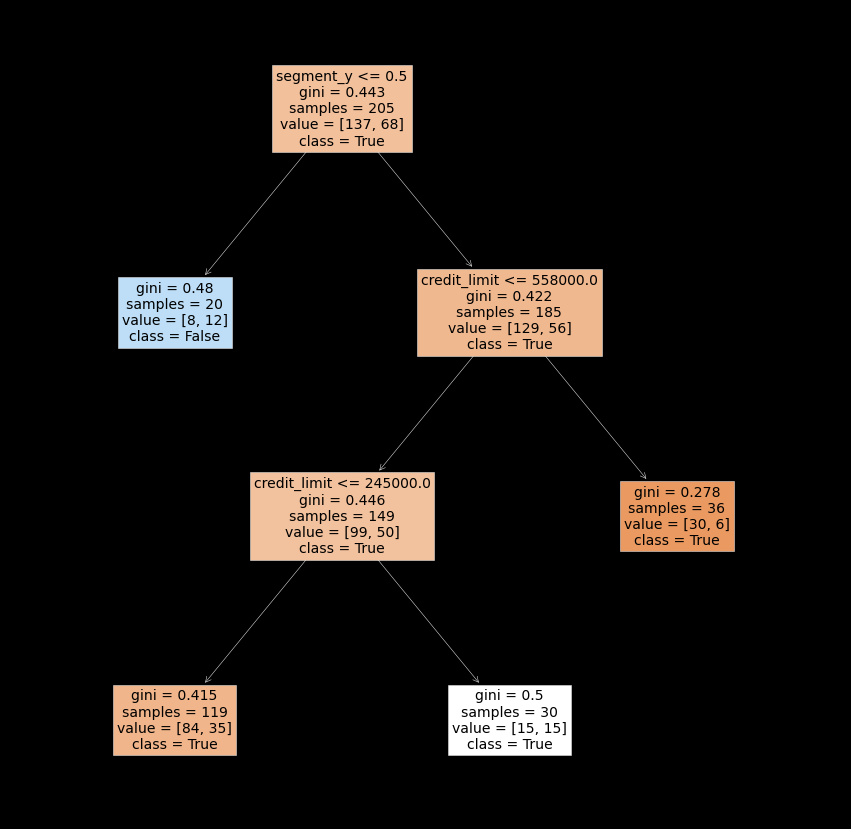

In [41]:


model = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 20)
model.fit(x_train,y_train)

result = model.predict(x_test)
print(accuracy_score(result, y_test))
print(confusion_matrix(result, y_test))
plot_tree(model,x_train)

#####Random Forest

0.5882352941176471
[[55 36]
 [ 6  5]]


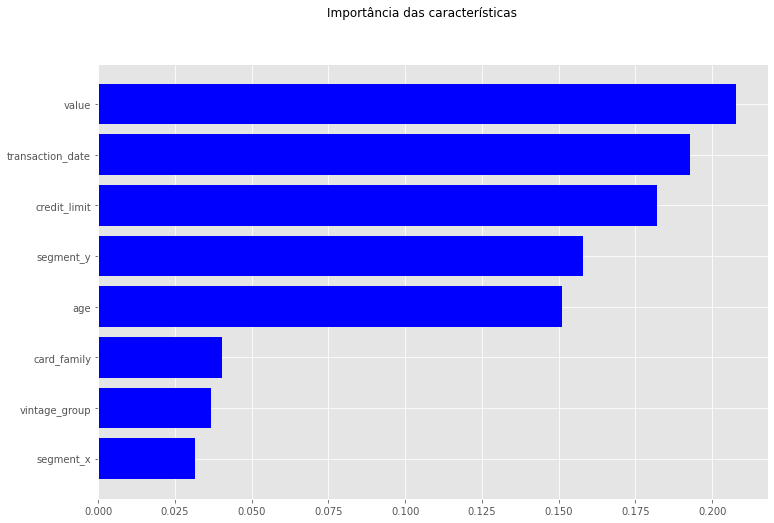

In [42]:


model = RandomForestClassifier()
model.fit(x_train,y_train)

result = model.predict(x_test)
print(accuracy_score(result, y_test))
print(confusion_matrix(result, y_test))
#plot_importances(model,data)

importances = model.feature_importances_
indices = numpy.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), data.columns[indices])
plt.suptitle('Importância das características')
plt.show()

####Temos então que os modelos não performaram muito bem, mesmo com uma redução dos dados referentes à transações não fraudulentas. A falta de dados é o ponto mais importante para essa falta de performance. Com os dados e modelos feitos temos uma maior influência das informações de valor da transação, data da transação, limite de créditos e idade.